In [70]:
import numpy as np
import tensorflow as tf
print("Tensorflow version", tf.__version__)

Tensorflow version 2.1.0


In [71]:
from tensorflow import keras
print("Keras version", keras.__version__)

Keras version 2.2.4-tf


In [72]:
import matplotlib.pyplot as plt

In [73]:
np.random.seed(42) 
tf.random.set_seed(42)

In [74]:
fashion_mnist = keras.datasets.fashion_mnist

In [75]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [76]:
X_train_full.shape

(60000, 28, 28)

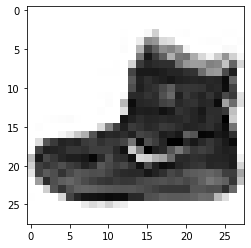

In [77]:
plt.imshow(X_train_full[0], cmap="Greys")

In [78]:
print ("item0", y_train_full[0])

item0 9


In [79]:
X_train = X_train_full[:55000]

In [80]:
y_train = y_train_full[:55000]

In [81]:
X_valid = X_train_full[55000:]

In [82]:
y_valid = y_train_full[55000:]

In [83]:
print("Train data shape:",X_train.shape)
print("Validation data shape:",X_valid.shape)
print("Test data shape:",X_test.shape)

Train data shape: (55000, 28, 28)
Validation data shape: (5000, 28, 28)
Test data shape: (10000, 28, 28)


In [84]:
X_mean = X_train.mean(axis=0, keepdims=True)

In [85]:
X_mean

array([[[8.18181818e-04, 5.87272727e-03, 3.11636364e-02, 1.06327273e-01,
         2.44490909e-01, 4.05709091e-01, 7.93327273e-01, 2.20625455e+00,
         5.71754545e+00, 1.44461636e+01, 3.29505091e+01, 4.58897455e+01,
         5.20294727e+01, 5.08248727e+01, 5.04579091e+01, 5.38428364e+01,
         5.14868364e+01, 4.06416727e+01, 2.61348909e+01, 1.04284364e+01,
         4.10814545e+00, 1.97052727e+00, 1.17556364e+00, 8.28927273e-01,
         4.63018182e-01, 2.55254545e-01, 9.61454545e-02, 1.57272727e-02],
        [7.60000000e-03, 2.57818182e-02, 1.05927273e-01, 3.67090909e-01,
         7.57272727e-01, 2.04585455e+00, 7.29925455e+00, 1.74846182e+01,
         3.19480727e+01, 5.27793636e+01, 7.96128000e+01, 1.00101491e+02,
         1.12948873e+02, 1.11085636e+02, 1.08916836e+02, 1.14630436e+02,
         1.10587455e+02, 9.10739273e+01, 7.16760182e+01, 4.50294182e+01,
         2.61382909e+01, 1.36139818e+01, 6.16156364e+00, 3.43096364e+00,
         2.17930909e+00, 1.19536364e+00, 4.6547272

In [86]:
X_std = X_train.std(axis=0, keepdims=True)

In [97]:
X_std

array([[[9.61970687e-02, 2.58073390e-01, 7.99733882e-01, 2.57899980e+00,
         4.19702347e+00, 5.73653207e+00, 8.09474324e+00, 1.41240995e+01,
         2.38771580e+01, 3.82435113e+01, 5.77645354e+01, 6.61367668e+01,
         6.86350734e+01, 6.79185249e+01, 6.74162387e+01, 6.95267001e+01,
         6.79678764e+01, 6.28086943e+01, 5.17885179e+01, 3.25200225e+01,
         2.01948800e+01, 1.41126824e+01, 1.07159734e+01, 9.06193976e+00,
         6.83508965e+00, 5.10441784e+00, 2.93730731e+00, 1.14281467e+00],
        [5.90913364e-01, 1.40599652e+00, 3.14331287e+00, 6.54774414e+00,
         9.73901021e+00, 1.56539675e+01, 2.99503163e+01, 4.81275327e+01,
         6.55715381e+01, 8.20951450e+01, 9.54730687e+01, 9.98944945e+01,
         1.03564792e+02, 1.02699251e+02, 1.02235080e+02, 1.03602196e+02,
         1.01454463e+02, 9.69141321e+01, 9.18679691e+01, 7.58146079e+01,
         5.92392831e+01, 4.30256430e+01, 2.96877160e+01, 2.31952471e+01,
         1.84739697e+01, 1.33816345e+01, 7.9581661

In [87]:
X_train = (X_train - X_mean) / X_std

In [88]:
X_valid = (X_valid - X_mean) / X_std

In [89]:
X_test = (X_test - X_mean) / X_std

In [90]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [91]:
print ("Shape of features", X_train.shape, X_valid.shape, X_test.shape)

Shape of features (55000, 28, 28, 1) (5000, 28, 28, 1) (10000, 28, 28, 1)


In [92]:
from functools import partial

In [93]:
DefaultConv2D = partial(keras.layers.Conv2D,
                kernel_size=3, activation='relu', padding="SAME")

In [94]:
model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]), 
    keras.layers.MaxPooling2D(pool_size=2), 
    DefaultConv2D(filters=128),  
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [95]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [96]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 99s 2ms/sample - loss: 0.7076 - accuracy: 0.7534 - val_loss: 0.3668 - val_accuracy: 0.8692
Epoch 2/3
55000/55000 [==============================] - 96s 2ms/sample - loss: 0.4181 - accuracy: 0.8583 - val_loss: 0.3194 - val_accuracy: 0.8878
Epoch 3/3
55000/55000 [==============================] - 96s 2ms/sample - loss: 0.3609 - accuracy: 0.8770 - val_loss: 0.3157 - val_accuracy: 0.8844


In [102]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 5s 502us/sample - loss: 0.3329 - accuracy: 0.8820


In [109]:
print(results[1])

0.882


In [110]:
X_new = X_test[10:20]

In [111]:
y_pred = model.predict(X_new)

In [112]:
print(np.argmax(y_pred, axis=1))

[4 5 7 3 4 1 2 4 8 0]


In [113]:
print (y_test[10:20])

[4 5 7 3 4 1 2 4 8 0]
